<a href="https://colab.research.google.com/github/Nicolaser1102/predicciones_ventas_comida/blob/main/Predicciones_venta_comida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CODING DOJO
Fecha creación:15/1/2022

Fecha de actualización: 23/1/2022

Esteban Simbaña

Practica Cargado y filtrado de datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
nombrearchivo = '/content/drive/MyDrive/Coding Dojo/Códigos/Solutions/data_sales/sales_predictions.csv'
sales_predictions_df = pd.read_csv(nombrearchivo)
sales_predictions_df1 = sales_predictions_df
sales_predictions_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Como inicio, se muestran los tipos de datos para su análisis 

In [4]:
sales_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB




*   Como se puede observar los datos en total recogidos serían de "8523" de los cuales en la columna de ('Item_Weight' , 'Outlet_Size') se encuentran datos faltantes 

*   Por otro lado, también podemos asegurar que cada tipo de variables corresponde lógicamente con los datos presentados en la sales_datadf



#  Datos faltantes 
Ahora se analiza los datos faltantes

In [5]:
sales_predictions_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Ahora se analiza que porcentaje de datos faltantes hay respectivamente 

Porcentaje datos faltantes de 'Item_Weight'

In [6]:
item_weight_missing = pd.isnull(sales_predictions_df['Item_Weight']).sum()
item_weight_missing #se guarda en una variable el total de datos faltantes 

1463

Se dividen para el total de datos y se multiplican por "100"

In [7]:
count_iw = sales_predictions_df['Item_Weight'].count()
count_iw
#como la funcion cuenta solo los datos que tienen valor
#sumamos los datos para tener el total de datos

7060

In [8]:
total_item_weight = item_weight_missing +  count_iw
total_item_weight

8523

In [9]:

#ahora si realizamos la conversion a porcentaje
prcent_iw_missing = (item_weight_missing/total_item_weight)*100
prcent_iw_missing #17.16 es el porcentaje de valores faltantes en la columna 'Item_Weight'

17.165317376510618

Porcentaje datos faltantes en 'Outlet_Size'

In [10]:
#ahora utilizaremos un método más automatizado para mostrar el porcentaje de datos de 'Outlet_Size'
sales_predictions_df['Outlet_Size'].isna().sum()/len(sales_predictions_df)*100
#nos muestra en pantalla el porcentaje total

28.27642848762173

In [11]:
#Mostramos todos los datos faltantes en porcentaje
sales_predictions_df.isna().sum()/len(sales_predictions_df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


*   Observamos que la variable 'Outlet_Size' tiene un 28% de datos faltantes por lo que se debería considerar eliminar la variable si no es prioritaria 
*  Mientras tanto, la variable 'Item_Weight' se podría inferir un dato para imputarlo a los datos faltantes.




# Datos estadísticos 

In [12]:
#mostramos los datos estadísticos de la df
sales_predictions_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800




1.   Se observa que la variable 'Item Weight' (la variable que tiene datos faltantes que podrían ser modificados) no esta tan dispersa con una variación estándar "std" de 4,64 
2.   La variable 'Oulet_Size' no se muestra por ser una variable categórica 
3. Se nota que hay una gran variación entre los datos de 'Item_Oulet_Sales' pero no hay gran problema porque tiene sentido su variación ya que pueden haber productos que se vendieron más o menos, debido a su popularidad, necesidad del cliente,etc.


# Rellenar datos faltantes 

Como se mostró anteriormente se puede modificar los datos faltantes de la variable 'Item_Weight'
Ya que es una variable de tipo númerica se puede optar por reemplazar los datos por el promedio "mean" de la variable.

In [13]:
#mostramos en una variable el promedio de la columna 'Item_Weight'
mean_Item_Weight = sales_predictions_df1['Item_Weight'].mean()
mean_Item_Weight

12.857645184136183

In [14]:
#ahora reemplazamos en sales_prediction_df1
sales_predictions_df1['Item_Weight'] = sales_predictions_df1['Item_Weight'].fillna(mean_Item_Weight)
sales_predictions_df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
#verificamos los datos faltantes
sales_predictions_df1.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Eliminar datos faltantes


Eliminamos las filas con variables faltantes en la columna de 'Oulet_Size'

In [16]:
sales_predictions_df1 = sales_predictions_df1.dropna(subset=['Outlet_Size'])
sales_predictions_df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


# Base de datos final 


Aplicados los cambios se mostraría la df final, teniendo en cuenta que con la poca información del negocio no podríamos borrar ninguna columna del todo ya que no conocemos a profundidad la base de datos

In [17]:
#base de datos final (aplicado un data_cleaning)

In [18]:
sales_predictions_df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# **Visualización de datos** 



In [193]:
#mostramos la df con la que vamos a trabajar 
sales_predictions_df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Gráfico 1

In [194]:
#importamos librerías para la visualiación de datos
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
#se ve la diferente información que nos muestra la tabla 
sales_predictions_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6113 non-null   object 
 1   Item_Weight                6113 non-null   float64
 2   Item_Fat_Content           6113 non-null   object 
 3   Item_Visibility            6113 non-null   float64
 4   Item_Type                  6113 non-null   object 
 5   Item_MRP                   6113 non-null   float64
 6   Outlet_Identifier          6113 non-null   object 
 7   Outlet_Establishment_Year  6113 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6113 non-null   object 
 10  Outlet_Type                6113 non-null   object 
 11  Item_Outlet_Sales          6113 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 780.9+ KB


In [196]:
#suma de todas las ventas por supermercado 
grafico1 =sales_predictions_df1.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()
grafico1 

Outlet_Type
Grocery Store         340.329723
Supermarket Type1    2340.986430
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [197]:
#Valores eje_y
grafico1_ejey =list(grafico1.values)
grafico1_ejey

[340.3297227272728, 2340.9864298764073, 1995.4987392241392, 3694.038557647059]

In [198]:
#valores eje x
grafico1_ejex = list(grafico1.keys())  
grafico1_ejex

['Grocery Store',
 'Supermarket Type1',
 'Supermarket Type2',
 'Supermarket Type3']

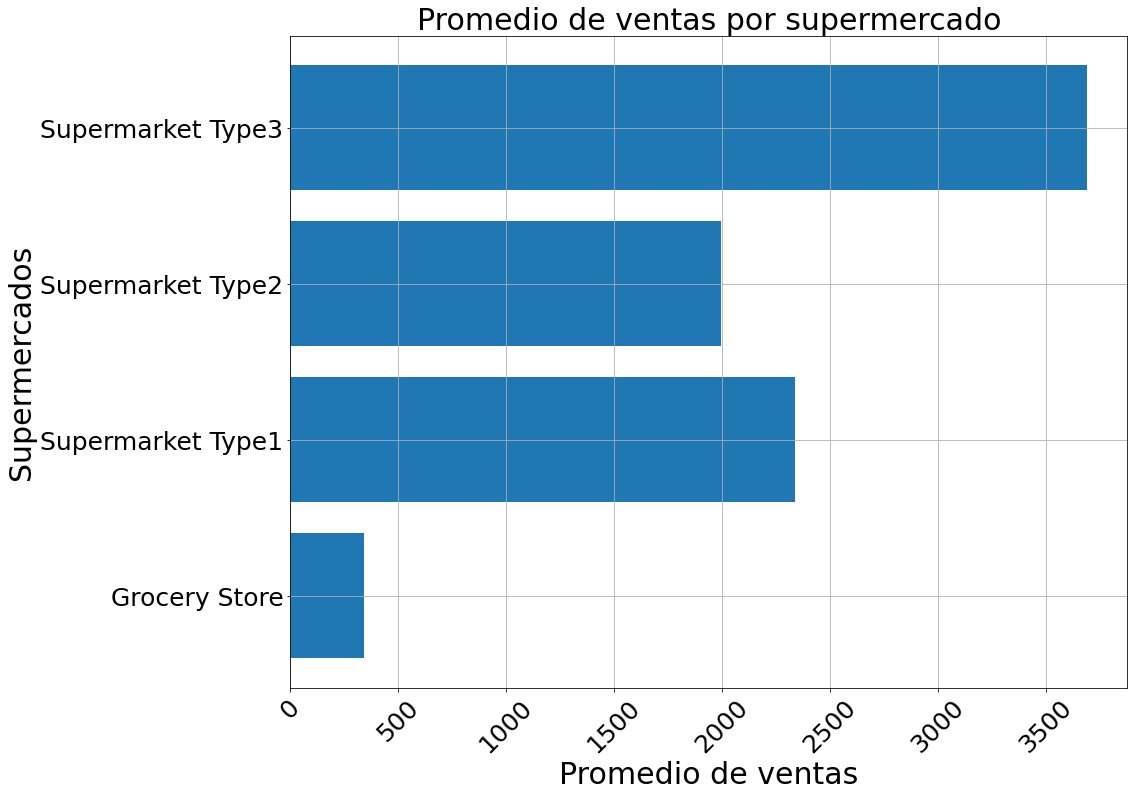

In [199]:
#definiendo los ejes x y y porcedemos a realizar un grafico de barras que nos muestre que 
#supermercado vende más 

#creamos gráfica
plt.figure(figsize=(15,12))
plt.barh (grafico1_ejex,grafico1_ejey);
plt.ylabel('Supermercados', fontsize=30)
plt.xlabel('Promedio de ventas', fontsize=30)
plt.title('Promedio de ventas por supermercado',fontsize=30)
plt.xticks(rotation=45,fontsize = 25)
plt.yticks(fontsize=25)
plt.grid()
plt.show()



**Conclusión**
- El gráfico muestra que hay más ventas en el Supermercado N°3 mientras que el que menos ventas tiene es el Grocery Store  
- Los Supermercados N°1 y N°2 tienen un número de ventas similar

## Gráfico 2

In [200]:
#vemos otros datos de la tabla
sales_predictions_df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000
mean,12.888856,0.064505,141.256859,1995.794373,2322.688445
std,4.073798,0.050092,62.229701,8.842615,1741.592093
min,4.555000,0.000000,31.290000,1985.000000,33.955800
25%,9.800000,0.026681,94.012000,1987.000000,974.731200
50%,12.857645,0.052811,143.178600,1997.000000,1928.156800
75%,15.700000,0.092834,185.892400,2004.000000,3271.075400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


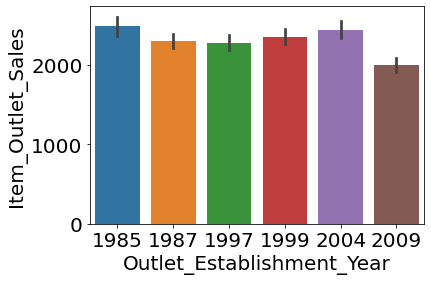

In [201]:
#realizamos la grafica con el objetivo de obtener 'ventas en relacion con el años de funcionamiento'
sns.barplot(x="Outlet_Establishment_Year", y="Item_Outlet_Sales", data=sales_predictions_df1);

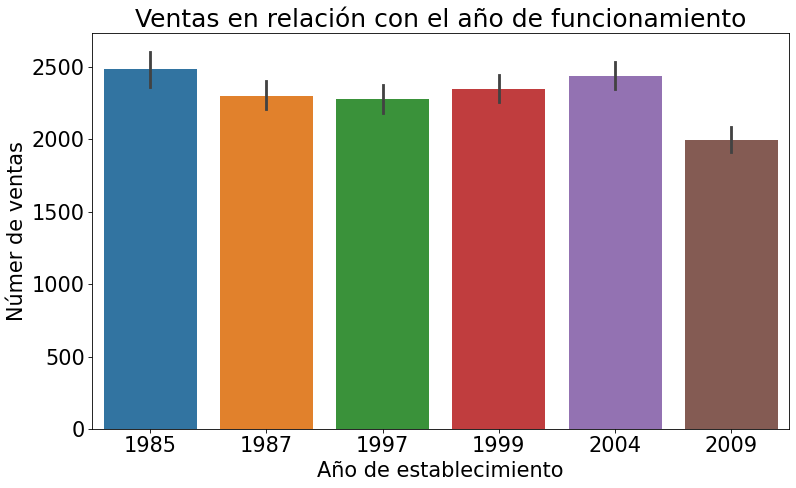

In [202]:

plt.figure(figsize=(12,7),dpi = 75)
a = sns.barplot(x="Outlet_Establishment_Year", y="Item_Outlet_Sales", data=sales_predictions_df1);
#Realizaremos algunos ajustes
a.set_title('Ventas en relación con el año de funcionamiento')
a.set_xlabel('Año de establecimiento')
a.set_ylabel('Númer de ventas')
pass

**Conclusión**
- En el año 2009 se pueden ver reducidas las ventas por lo que se deberían encontrar causas del porque ocurre este descenso y aplicar estrategias para subir las ventas.

##Gráfico 3 


In [203]:
#conocemos los datos de cuanto es el promedio de ventas por tipo de producto
grafico3 =sales_predictions_df1.groupby('Item_Type')['Item_Outlet_Sales'].mean()
grafico3

Item_Type
Baking Goods             2066.375730
Breads                   2407.302188
Breakfast                2303.524727
Canned                   2303.547845
Dairy                    2352.180121
Frozen Foods             2262.479339
Fruits and Vegetables    2434.420413
Hard Drinks              2310.942315
Health and Hygiene       2186.035472
Household                2442.158504
Meat                     2348.076214
Others                   1989.491595
Seafood                  2433.918743
Snack Foods              2427.803649
Soft Drinks              2086.753774
Starchy Foods            2537.401846
Name: Item_Outlet_Sales, dtype: float64

In [207]:
#datos para el eje y
grafico3_ejey = list(grafico3.values)
grafico3_ejey

[2066.375729589632,
 2407.3021877094966,
 2303.524726582278,
 2303.547845010614,
 2352.1801209677424,
 2262.4793385365833,
 2434.420412910531,
 2310.9423148648652,
 2186.0354719346055,
 2442.158503543911,
 2348.076213592232,
 1989.4915951219514,
 2433.9187434782602,
 2427.8036486175074,
 2086.7537743589733,
 2537.4018457142856]

In [208]:
#datos para el eje x
grafico3_ejex = list(grafico3.keys())
grafico3_ejex

['Baking Goods',
 'Breads',
 'Breakfast',
 'Canned',
 'Dairy',
 'Frozen Foods',
 'Fruits and Vegetables',
 'Hard Drinks',
 'Health and Hygiene',
 'Household',
 'Meat',
 'Others',
 'Seafood',
 'Snack Foods',
 'Soft Drinks',
 'Starchy Foods']

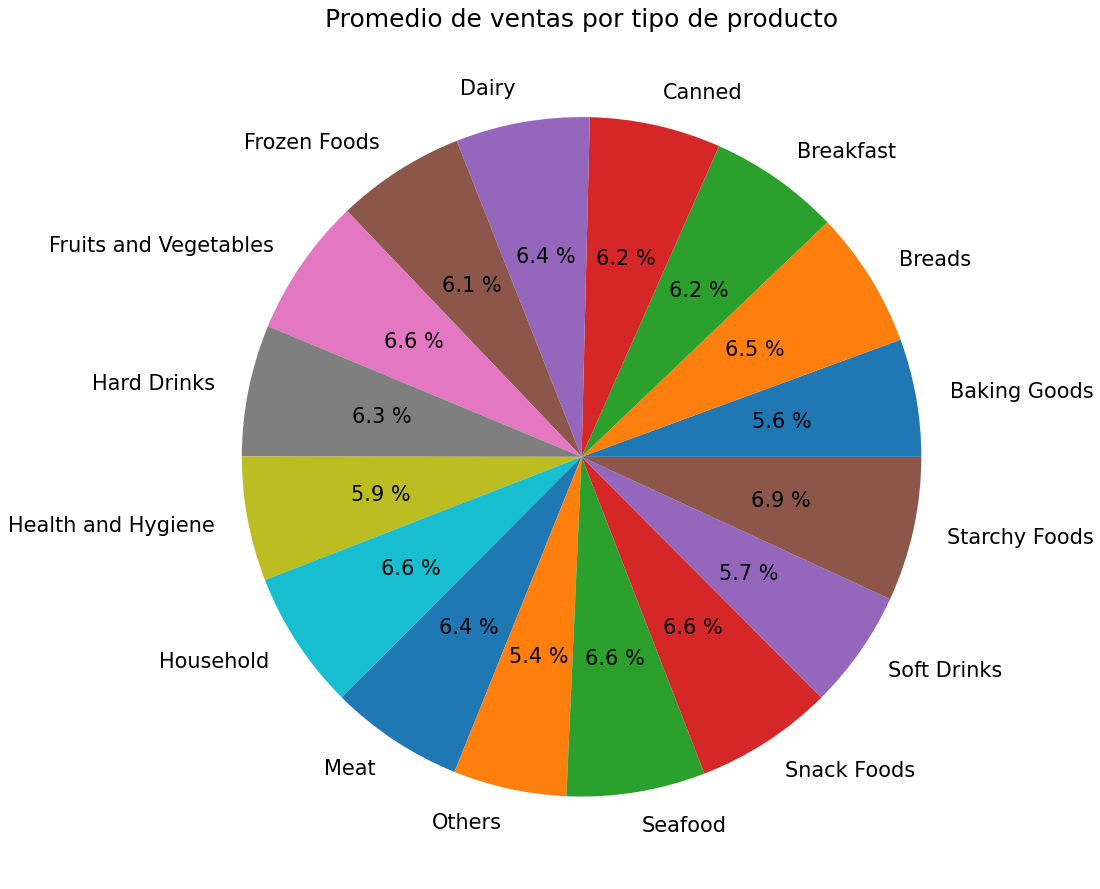

In [211]:
#realizamos la figura
figura = plt.figure(figsize=(20,15),dpi = 75)
ax = figura.gca()
plt.pie(grafico3_ejey, labels=grafico3_ejex,autopct="%0.1f %%")
ax.set_title('Promedio de ventas por tipo de producto')


pass

**Conlusión** 
- Se observa en la gráfica que no hay variación respecto al porcentaje con que los productos se venden en las diferentes tiendas, infiriendo que todos los productos tienen su respectivo protagonismo al ser elegidos por los usuarios